In [1]:
import io
import os 
from math import prod
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC


In [2]:
path = os.getcwd()
train = pd.read_csv(path + "\\train.csv")
test = pd.read_csv(path + "\\test.csv")
path

'c:\\Users\\sonia\\OneDrive\\Bureau\\Celisse\\Apprentissage_Statistique'

In [59]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Bob has start his own mobile comapny. He wants to give tough fight to big companies like Apple, Samsung, etc. 
<br>

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies. 
<br>

Bob wants to find out some relation between features of a mobile phone (eg:- RAM, Internal Memory etc) and its selling price. But he is not good at Machine Learning. So he needs your help to solve this problem. <br>

In this problem **you do not have to predict actual price** but a price range indicating how high the price is. 

**CLASSIFICATION PROBLEM**
<br><br><br>

## Exploration des données

In [61]:
def df_analyse(df, columns, name_df):
    """
    Initial analysis on the DataFrame.

    Parameters
    ----------
    Args:
        df (pandas.DataFrame): DataFrame to analyze.
        columns (list): Dataframe keys in list format.
        name_df (str): DataFrame name.

    Returns:
        None. 
        Print the initial analysis on the DataFrame. 
    """
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
  
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["Name", "Type"])
        df_resume["Records"] = list(df.count())
        
        print("\nInitial Analysis of", name_df, "dataset")
        print("--------------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        
        print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                    print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
        print("\n- Type object and records by columns         (",memory_usage,")")
        print("--------------------------------------------------------------------------")
        print(df_resume.sort_values("Records", ascending=False))
        
        
# Analyse df
#df_analyse(test, ["id"], "train")
df_analyse(train, ["battery_power"], "train")



Initial Analysis of train dataset
--------------------------------------------------------------------------
- Dataset shape:                  2000 rows and 20 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0

- The key(s): ['battery_power'] is present multiple times in the dataframe.
  It CANNOT be used as a primary key.

- Type object and records by columns         ( memory usage: 312.6 KB )
--------------------------------------------------------------------------
             Name     Type  Records
0   battery_power    int64     2000
1            blue    int64     2000
18   touch_screen    int64     2000
17        three_g    int64     2000
16      talk_time    int64     2000
15           sc_w    int64     2000
14           sc_h    int64     2000
13            ram    int64     2000
12       px_width    int64     2000
11      px_height    int

In [58]:

df_analyse(test, ["id"], "train")


Initial Analysis of train dataset
--------------------------------------------------------------------------
- Dataset shape:                  1000 rows and 21 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0

- The key(s): ['id'] is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns         ( memory usage: 164.2 KB )
--------------------------------------------------------------------------
             Name     Type  Records
0              id    int64     1000
11             pc    int64     1000
19   touch_screen    int64     1000
18        three_g    int64     1000
17      talk_time    int64     1000
16           sc_w    int64     1000
15           sc_h    int64     1000
14            ram    int64     1000
13       px_width    int64     1000
12      px_height    int64     100

In [42]:
train['px'] = train['px_height']*train['px_width']
train['sc'] = train['sc_h']*train['sc_w']
train['pcf'] = train['pc']*train['fc']

In [63]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,px,sc
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1464096,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,2309580,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,1797975,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,1416576,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,225120,180


## Modélisation

### Choix des variables

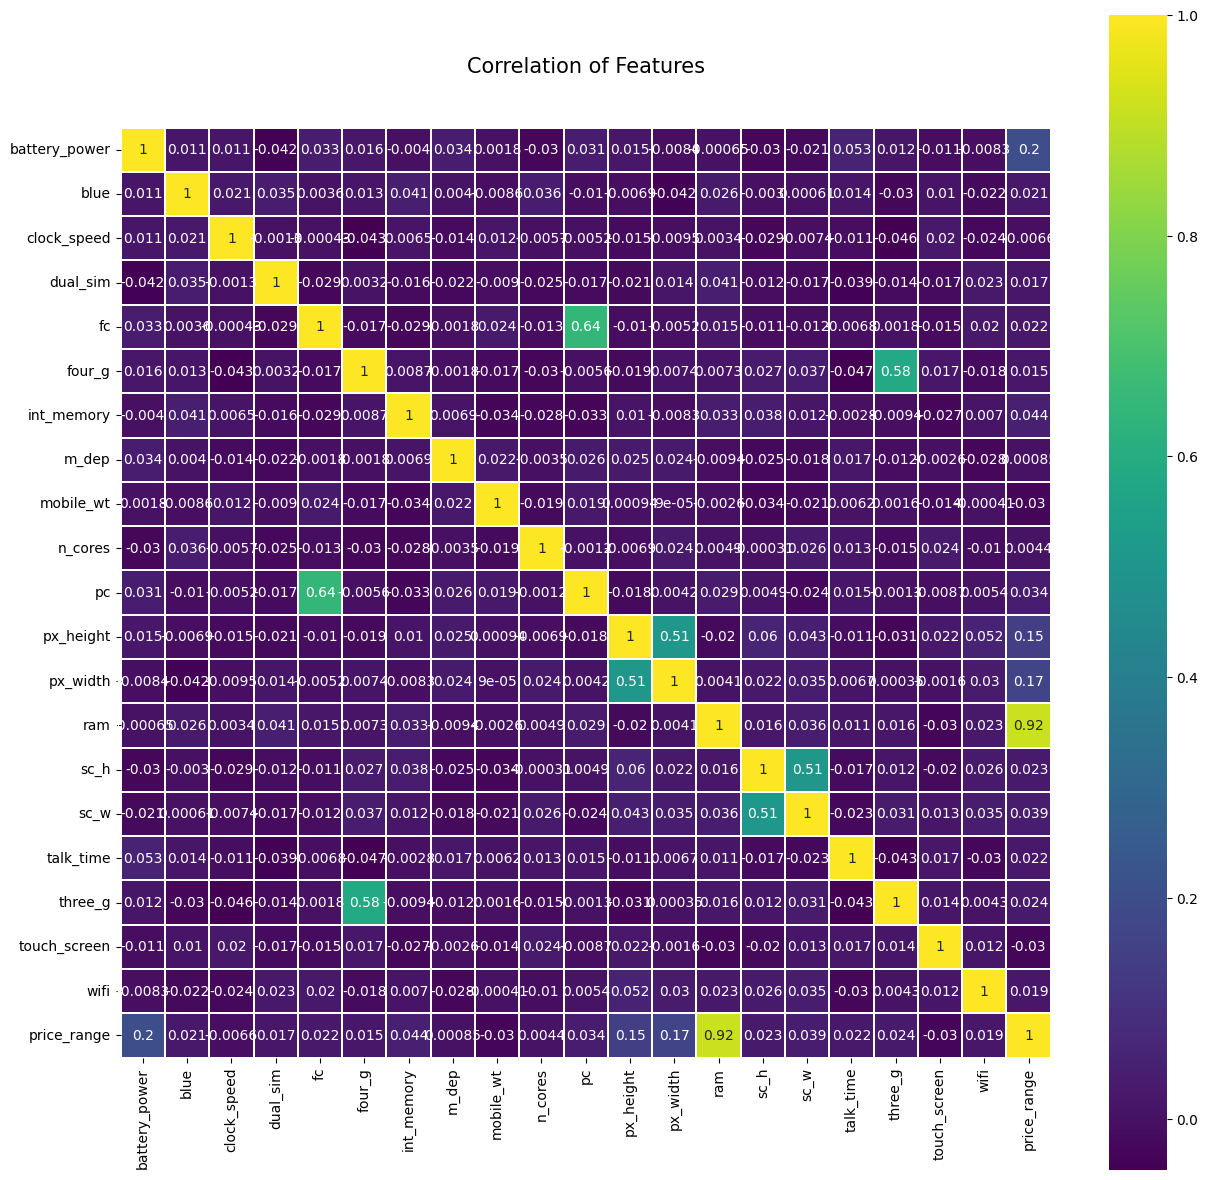

In [3]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

#### A priori on garde battery_power, px_height, px_width et ram

In [47]:
#y = train.pop('price_range') # Variable target
X = train   # Matrice des variables explicatives

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### PCA

In [142]:
X_array = train.to_numpy()

In [49]:
import numpy as np

# Your data as a numpy array

# Mean center the data
X_mean = np.mean(X_train, axis=0)
X_centered = X_train - X_mean

# Calculate the covariance matrix
cov = np.cov(X_centered.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov)

# Sort the eigenvectors by their eigenvalues
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Project the data onto the first k principal components
k = 1
X_reduced = np.dot(X_centered, eigen_vectors[:, :k])

# If you want to get back the original data after PCA, use the following:
X_recovered = np.dot(X_reduced, eigen_vectors[:, :k].T) + X_mean

ValueError: Length of values (1600) does not match length of index (23)

### Random Classifier

In [148]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,px,sc,pcf
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,15120,63,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,1799140,51,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2167308,22,12
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2171776,128,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1464096,16,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,2309580,52,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,1797975,110,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,1416576,9,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,225120,180,20


In [44]:
# Fine tuning

tuned_parameters = [{'max_depth': [30,35], 'n_estimators': [50,85,100,125,150], 'min_samples_split':[2,4], 'min_samples_leaf':[2,3,4]}]
acc_rfc = ['accuracy_score(y_test,y_pred)']
for value in acc_rfc:
    rfc = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, random_state=0)
    rfc.fit(X_train, y_train)
    y_true, y_pred = y_test, rfc.predict(X_test)
    
print('The best hyper-parameters for RF Classifier are: ', rfc.best_params_)

The best hyper-parameters for RF Classifier are:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 35}


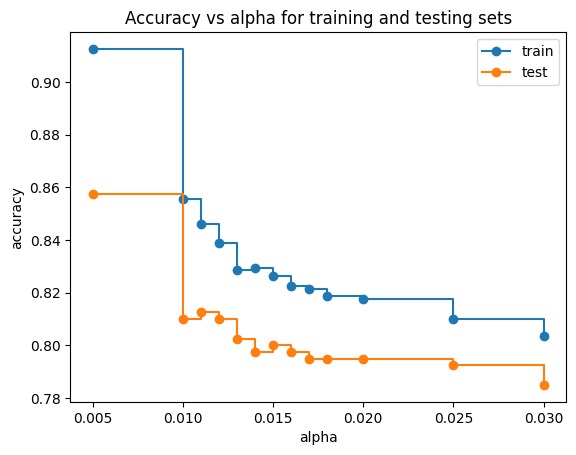

In [45]:
ccp_alphas = [0.005,0.01,0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.02,0.025,0.03]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = RandomForestClassifier(n_estimators= 150, min_samples_split=2, max_depth= 35, min_samples_leaf = 2,random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [46]:
rfc = RandomForestClassifier(n_estimators= 125, min_samples_split= 4, max_depth= 35, min_samples_leaf = 4,  ccp_alpha=0.015, random_state=0)
rfc.fit(X_train, y_train)
print('RF Classifier Accuracy Score train : ', rfc.score(X_train, y_train))
print('RF Classifier Accuracy Score test : ', rfc.score(X_test, y_test))

RF Classifier Accuracy Score train :  0.826875
RF Classifier Accuracy Score test :  0.8025


### CART - Decision Tree Classifier

In [6]:
# Fine tuning
tuned_parameters = [{'criterion': ['gini'], 'max_depth':[3,5,10,15], 'min_samples_leaf':[1,2,5], 'max_leaf_nodes' :[10,13,15], 
                     'min_samples_split': [2,3,5],'random_state':[0]}]
acc_cart = ['accuracy_score(y_test,y_pred)']
for value in acc_cart:
    cart_ft = RandomizedSearchCV(DecisionTreeClassifier(),  tuned_parameters, cv=5)
    cart_ft.fit(X_train, y_train)
    y_true, y_pred = y_test, cart_ft.predict(X_test)
    
print('The best hyper-parameters for CART are: ', cart_ft.best_params_)

The best hyper-parameters for CART are:  {'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'gini'}


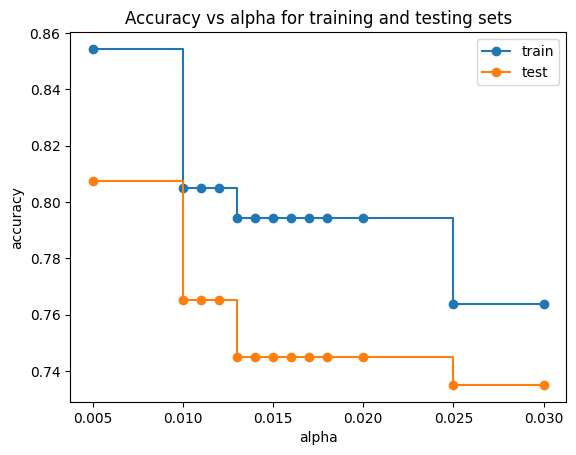

In [7]:
ccp_alphas = [0.005,0.01,0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.02,0.025,0.03]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, max_leaf_nodes=15, min_samples_split=3,random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [9]:
cart = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 5, max_leaf_nodes=15, min_samples_split=3,random_state=0, ccp_alpha=ccp_alpha)
cart = cart.fit(X_train,y_train)
print('CART Classifier Accuracy Score train : ', cart.score(X_train, y_train))
print('CART Classifier Accuracy Score test : ', cart.score(X_test, y_test))

CART Classifier Accuracy Score train :  0.76375
CART Classifier Accuracy Score test :  0.735


### Gradient Boosting Classifier

In [48]:
# Fine tuning
#tuned_parameters = [{'n_estimators': [1200], 'max_depth': [4,6],'min_samples_split': [2,4],'learning_rate': [1,0.1],'loss': ["log_loss"],'random_state':[0]}]
#acc_cart = ['accuracy_score(y_test,y_pred)']
#for value in acc_cart:
#    xgb = RandomizedSearchCV(GradientBoostingClassifier(),  tuned_parameters, cv=3)
#    xgb.fit(X_train, y_train)
#    y_true, y_pred = y_test, xgb.predict(X_test)
    
#print('The best hyper-parameters for XGB are: ', xgb.best_params_)

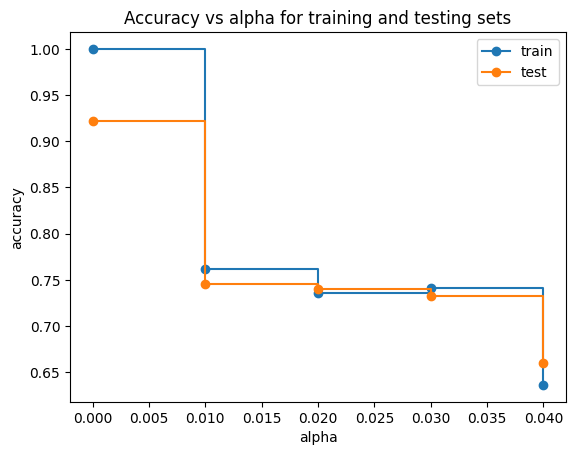

In [239]:
ccp_alphas = [0,0.01,0.02,0.03,0.04]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = GradientBoostingClassifier(n_estimators=1200, min_samples_split=2,max_depth=4,loss='log_loss',learning_rate=1, random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train) 
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

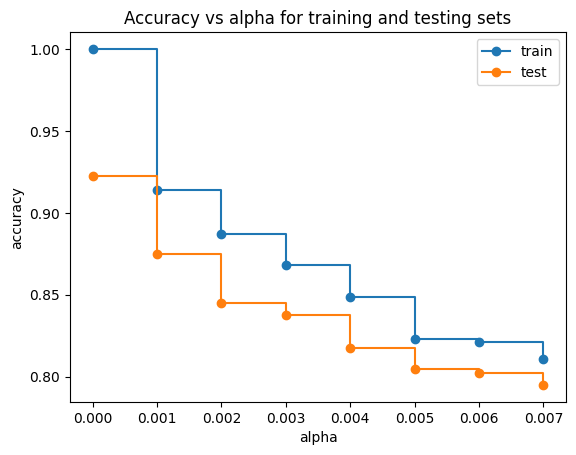

In [240]:
ccp_alphas = [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007]
clfs = []
for ccp_alpha in ccp_alphas:
    clf = GradientBoostingClassifier(n_estimators=1200, min_samples_split=2,max_depth=4,loss='log_loss',learning_rate=1, random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train) 
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
classifier_xgb = GradientBoostingClassifier(n_estimators=1000, min_samples_split=2,max_depth=4,loss='log_loss',learning_rate=1, random_state=0,ccp_alpha=0.006)
classifier_xgb.fit(X_train, y_train)
print('XGBoost Classifier Accuracy Score train : ', classifier_xgb.score(X_train, y_train))
print('XGBoost Classifier Accuracy Score test : ', classifier_xgb.score(X_test, y_test))

XGBoost Classifier Accuracy Score train :  0.82125
XGBoost Classifier Accuracy Score test :  0.8025


In [51]:
from sklearn.decomposition import PCA
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd

# Split data into training and test sets
# [['battery_power','px','ram','sc','sc_w','sc_h','mobile_wt']] 

path = os.getcwd()
train = pd.read_csv(path + "\\train.csv")
test = pd.read_csv(path + "\\test.csv")

y = train.pop('price_range')
X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the pipeline
pca = make_pipeline(StandardScaler(), PCA(n_components=4, random_state=0))

# Fit the pipeline to the training data
pca.fit(X_train, y_train)


# 'subsample':[0.3,0.6]
# 'max_depth': [2,4],

# Fine tuning
tuned_parameters = [{'booster':['gblinear'],'n_estimators': [  100,125,150,200], 'learning_rate': [0.3,0.5,0.7],'random_state':[0]}]
acc_cart = ['accuracy_score(y_test,y_pred)']
for value in acc_cart:
    xgb_model = GridSearchCV(xgb.XGBClassifier(),  tuned_parameters, cv=5)
    xgb_model.fit(pca.transform(X_train), y_train)
    y_true, y_pred = y_test, xgb_model.predict(pca.transform(X_test))
    
print('The best hyper-parameters for XGB are: ', xgb_model.best_params_)




# Train the KNN model
classifier_xgb = xgb.XGBClassifier(** xgb_model.best_params_, objective=['multi:softprob'])
classifier_xgb.fit(pca.transform(X_train), y_train)

# Evaluate the model on the training and test sets
train_accuracy = classifier_xgb.score(pca.transform(X_train), y_train)
test_accuracy = classifier_xgb.score(pca.transform(X_test), y_test)

print("Number of components kept by PCA:", pca.named_steps['pca'].n_components_)
print(pca.get_feature_names_out())
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)




The best hyper-parameters for XGB are:  {'booster': 'gblinear', 'learning_rate': 0.3, 'n_estimators': 125, 'random_state': 0}
Number of components kept by PCA: 4
['pca0' 'pca1' 'pca2' 'pca3']
Training accuracy: 0.31375
Test accuracy: 0.3


### Standardization

In [8]:
scaler = StandardScaler()   

#y = train.pop('price_range')
#X = train
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
X_train_scaled

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
        -1.02532046e+00, -7.58191581e-01,  1.01820988e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.02532046e+00, -5.31979908e-01, -1.04823795e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         9.75304830e-01,  3.23153358e+00, -6.99524876e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
         9.75304830e-01,  1.65547038e+00,  1.27054253e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         9.75304830e-01, -7.19204801e-01,  3.66471606e-02],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         9.75304830e-01, -4.97361405e-01, -3.24981208e-01]])

In [45]:
X = train
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
# We don't need this
X_train_norm = normalize(Xtrain, norm='l2')
X_test_norm = normalize(Xtest, norm='l2')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [153]:
X_train

,battery_power,px,ram,sc,pcf
582,1232,292049,1257,160,17
159,1840,480495,1078,0,192
1827,1692,3615696,3779,27,68
318,508,21723,663,156,56
708,977,2796724,3714,57,30
...,...,...,...,...,...
835,1224,293886,3796,50,162
1216,1158,558556,1542,153,20
1653,1190,2302754,3610,91,0
559,1191,324527,1028,84,14


### K-Nearest Neighbors

In [179]:
X = trainX = train[['battery_power','px','ram','int_memory','mobile_wt']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [180]:
# Fine tuning

tuned_parameters = [{'n_neighbors':[13,15,17],'weights':['distance','uniform'],'algorithm':['auto'], 'metric' : ['manhattan','euclidean','minkowski'], 'leaf_size':[2,5]}]
acc_knn = ['accuracy_score(y_test,y_pred)']
for value in acc_knn:
    knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
    knn.fit(X_train_scaled, y_train)
    y_true, y_pred = y_test, knn.predict(X_test_scaled)
    
print('The best hyper-parameters for KNN are: ', knn.best_params_)

The best hyper-parameters for KNN are:  {'algorithm': 'auto', 'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


In [181]:
knn_clf = KNeighborsClassifier(algorithm= 'auto', leaf_size= 2, metric= 'manhattan', n_neighbors= 17, weights= 'distance')

knn_clf.fit(X_train_scaled, y_train)
#y_pred_knn = knn_clf.predict(X_test_scaled)

print('KNN Classifier Accuracy Score train : ', knn_clf.score(X_train_scaled, y_train))
print('KNN Classifier Accuracy Score test : ', knn_clf.score(X_test_scaled, y_test))


KNN Classifier Accuracy Score train :  1.0
KNN Classifier Accuracy Score test :  0.6175


In [182]:
knn_clf = KNeighborsClassifier(**knn.best_params_)

knn_clf.fit(X_train, y_train)
#y_pred_knn = knn_clf.predict(X_test_scaled)

print('KNN Classifier Accuracy Score train : ', knn_clf.score(X_train, y_train))
print('KNN Classifier Accuracy Score test : ', knn_clf.score(X_test, y_test))


KNN Classifier Accuracy Score train :  1.0
KNN Classifier Accuracy Score test :  0.4125


### Support Vector Machine

In [16]:
#Fine tuning
#tuned_parameters = [{'kernel': ['linear'], 'C':[10,12,14], 'gamma': ['scale'], 'decision_function_shape':['ovo']}]
#acc_svm = ['accuracy_score(y_test,y_pred)']
#for value in acc_svm:
 #   svm = GridSearchCV(SVC(), tuned_parameters, cv=5)
 #   svm.fit(X_train, y_train)
 #   y_true, y_pred = y_test, svm.predict(X_test)
    
#print('The best hyper-parameters for SVM are: ', svm.best_params_)

In [124]:
from sklearn.decomposition import PCA
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split data into training and test sets
# [['battery_power','px','ram','sc','sc_w','sc_h','mobile_wt']] 
X = train[['battery_power','px','ram','sc','mobile_wt']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the pipeline
pca = make_pipeline(StandardScaler(), PCA(n_components=4, random_state=0))

# Fit the pipeline to the training data
pca.fit(X_train, y_train)



# Fine tuning
#tuned_parameters = [{'kernel': ['linear'], 'C':[10,12,14], 'gamma': ['scale'], 'decision_function_shape':['ovo']}]
#acc_svm = ['accuracy_score(y_test,y_pred)']
#for value in acc_svm:
 #   svm = GridSearchCV(SVC(), tuned_parameters, cv=5)
  #  svm.fit(X_train, y_train)
   # y_true, y_pred = y_test, svm.predict(X_test)
    
#print('The best hyper-parameters for SVM are: ', svm.best_params_)




# Train the KNN model
svm_clf = SVC(gamma='scale',degree = 2, C=30, kernel='linear',decision_function_shape='ovo')
#svm_clf = SVC(degree = 2, C=10, kernel='linear',decision_function_shape='ovo')
svm_clf.fit(pca.transform(X_train), y_train)

# Evaluate the model on the training and test sets
train_accuracy = svm_clf.score(pca.transform(X_train), y_train)
test_accuracy = svm_clf.score(pca.transform(X_test), y_test)

print("Number of components kept by PCA:", pca.named_steps['pca'].n_components_)
print(pca.get_feature_names_out())
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)




Number of components kept by PCA: 4
['pca0' 'pca1' 'pca2' 'pca3']
Training accuracy: 0.83125
Test accuracy: 0.81


In [237]:
from sklearn.decomposition import PCA
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = train[['battery_power','px','ram','sc','sc_w','sc_h','mobile_wt']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the pipeline
pca = make_pipeline(StandardScaler(), PCA(n_components=7, random_state=0))

# Fit the pipeline to the training data
pca.fit(X_train, y_train)

# Train the KNN model
svm_clf = SVC(degree = 2, C=9, kernel='linear',decision_function_shape='ovo')
svm_clf.fit(pca.transform(X_train), y_train)

# Evaluate the model on the training and test sets
train_accuracy = svm_clf.score(pca.transform(X_train), y_train)
test_accuracy = svm_clf.score(pca.transform(X_test), y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)



Training accuracy: 0.94
Test accuracy: 0.9475


In [6]:
# A smaller value of C will result in a larger margin, but may lead to more misclassifications. 
# A larger value of C will result in a smaller margin, but may lead to fewer misclassifications. 

# The gamma parameter determines the width of the RBF kernel. 
# A smaller gamma value means the kernel is wide and can fit a larger decision boundary while a 
# larger gamma value means the kernel is narrow and can fit a smaller decision boundary.

# gamma='scale',

#svm_clf = SVC(gamma='scale', C=1, kernel='linear', decision_function_shape='ovo') # ou polynomial

svm_clf = SVC(degree = 1, C=3, kernel='linear',decision_function_shape='ovo') # ou polynomial

#svm_clf = SVC(gamma='scale',C=10,kernel='linear',decision_function_shape='ovo')

svm_clf.fit(X_train_scaled, ytrain)
#y_pred_svm=svm_clf.predict(X_test_norm)


print('SVM Classifier Accuracy Score train : ', svm_clf.score(X_train_scaled, ytrain))
print('SVM Classifier Accuracy Score test : ', svm_clf.score(X_test_scaled, ytest))

# SVM Classifier Accuracy Score:  0.97 avec kernel linear

NameError: name 'X_train_scaled' is not defined

In [213]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#reduced_data = PCA(n_components=2).fit(Xtrain).transform(Xtrain)


X = train[['battery_power','px','ram','sc','sc_w','sc_h']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

random_state = 0
pca = make_pipeline(StandardScaler(), PCA(n_components=4, random_state=random_state))
model = pca.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=25,algorithm= 'auto', metric= 'manhattan', weights= 'distance')
knn.fit(model.transform(X_train), y_train)
acc_knn2 = knn.score(model.transform(X_train), y_train)
acc_knn = knn.score(model.transform(X_test), y_test)

print(model.feature_names_in_)
print(acc_knn2)
print(acc_knn)

#reg_log = LogisticRegression(C=20,solver = 'lbfgs', max_iter=200)

##reg_log.fit(reduced_data,y_train)



['battery_power' 'px' 'ram' 'sc' 'sc_w' 'sc_h']
1.0
0.91


In [218]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = train[['battery_power','px','ram','sc','sc_w','sc_h']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the pipeline
pca = make_pipeline(StandardScaler(), PCA(n_components=4, random_state=0))

# Fit the pipeline to the training data
pca.fit(X_train, y_train)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=25,algorithm= 'auto', metric= 'manhattan', weights= 'distance')
knn.fit(pca.transform(X_train), y_train)

# Evaluate the model on the training and test sets
train_accuracy = knn.score(pca.transform(X_train), y_train)
test_accuracy = knn.score(pca.transform(X_test), y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)



Training accuracy: 1.0
Test accuracy: 0.91


In [187]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#reduced_data = PCA(n_components=2).fit(Xtrain).transform(Xtrain)

# px = px_height * px_width
# sc = sc_h * sc_w

X = train[['battery_power','px','ram','sc']] 
#X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


random_state = 0
pca = make_pipeline(StandardScaler(), PCA(n_components=4, random_state=random_state))
model = pca.fit(X_train, y_train)
reg_log = LogisticRegression(solver = 'lbfgs', max_iter=100)
reg_log.fit(model.transform(X_train), y_train)
reg_log1 = reg_log.score(model.transform(X_train), y_train)
reg_log2 = reg_log.score(model.transform(X_test), y_test)

print(model.feature_names_in_)
print(reg_log1)
print(reg_log2)

#reg_log = LogisticRegression(C=20,solver = 'lbfgs', max_iter=200)

##reg_log.fit(reduced_data,y_train)



['battery_power' 'px' 'ram' 'sc']
0.933125
0.925


### Régression logistique

In [5]:
reg_log = LogisticRegression(C=20,solver = 'lbfgs', max_iter=200)

reg_log.fit(X_train_scaled, y_train)
#y_pred_knn = knn_clf.predict(X_test_scaled)

print('Logistic Regression Accuracy Score train : ', reg_log.score(X_train_scaled, ytrain))
print('Logistic Regression Accuracy Score test : ', reg_log.score(X_test_scaled, ytest))


NameError: name 'X_train_scaled' is not defined

In [131]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X = train[['battery_power','px','ram','sc','sc_w','sc_h','pcf']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the pipeline
pca = make_pipeline(MinMaxScaler(), PCA(n_components=6, random_state=0))

# Fit the pipeline to the training data
pca.fit(X_train, y_train)

# Train the KNN model
reg_log = LogisticRegression(C=20,solver = 'lbfgs', max_iter=200)
reg_log.fit(pca.transform(X_train), y_train)

# Evaluate the model on the training and test sets
train_accuracy = reg_log.score(pca.transform(X_train), y_train)
test_accuracy = reg_log.score(pca.transform(X_test), y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)



Training accuracy: 0.935
Test accuracy: 0.9325


## RECAP

In [99]:

data = {"Random Forest":[rfc.score(X_train, y_train), rfc.score(X_test, y_test)], "Decision Tree (CART)":
[cart.score(X_train, y_train), cart.score(X_test, y_test)], "XGBoost":
[classifier_xgb.score(X_train, y_train), classifier_xgb.score(X_test, y_test)], "KNN":
[knn_clf.score(X_train_scaled, y_train),knn_clf.score(X_test_scaled, y_test)], "SVM":
[svm_clf.score(Xtrain, ytrain), svm_clf.score(Xtest, ytest)]}

print ("{:<22} {:<15} {:<10}".format('Model','Train','Test'))
for k, v in data.items():
    train, test = v
    print ("{:<22} {:<15} {:<10}".format(k, train, test))


Model                  Train           Test      
Random Forest          0.845625        0.825     
Decision Tree (CART)   0.794375        0.745     
XGBoost                0.815625        0.795     
KNN                    1.0             0.875     
SVM                    0.98875         0.9775    


# Best is SVM : on peut encore réduire l'overfitting, c'est pas terminé